<a href="https://colab.research.google.com/github/vijayseshachala2003/ML-projects/blob/main/trail21_05_eff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_excel("LT Meter Data.xlsx")

In [ ]:
data = df.sort_values(by = 'DATE', ignore_index=True)

In [ ]:
fd = data
data=fd[['DATE', 'voltage_status']]

In [ ]:
fd['date']=pd.to_datetime(fd['DATE'])


In [ ]:
data=data.set_index(fd.date)
data=data.drop(['DATE'],axis=1)

In [ ]:
data = data[data['voltage_status']!=0]

In [ ]:
min=data.resample('T').last().ffill()
df=min
df.reset_index(inplace=True)

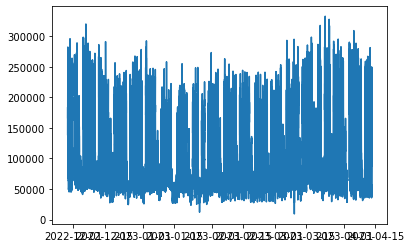

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.plot(df['date'],df['voltage_status'])
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.show()

In [ ]:
# for period calculation 
mean = df['date'].mean()
std = str(df['date'].std())
print(std)
num = std.split(' ')
period = int(num[0])
#print(mean)

39 days 06:28:25.666681583


In [ ]:
print(num)
print(type(period))

['39', 'days', '06:28:25.666681583']
<class 'int'>


In [ ]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose

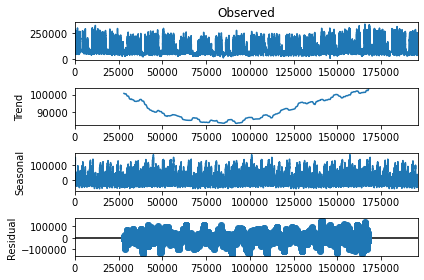

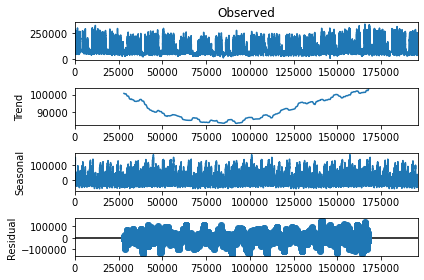

In [ ]:

results = seasonal_decompose(df['voltage_status'].values,period=period*60*24)
results.plot()

In [ ]:
# sampling the time periods through dates 

df['dates_n'] = pd.to_datetime(df['date']).dt.date
print(df['dates_n'])
unique_d = df['dates_n']
print(len(df['dates_n'].unique()))

0         2022-11-28
1         2022-11-28
2         2022-11-28
3         2022-11-28
4         2022-11-28
             ...    
195884    2023-04-13
195885    2023-04-13
195886    2023-04-13
195887    2023-04-13
195888    2023-04-13
Name: dates_n, Length: 195889, dtype: object
137


In [ ]:
df['times'] = pd.to_datetime(df['date']).dt.time

print(len(df['times'].unique()))

1440


In [ ]:
daY_1 = df[df['dates_n'] == unique_d[2116]]

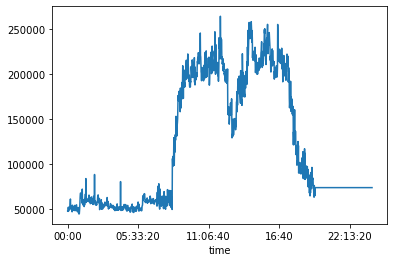

In [ ]:
plt.plot(daY_1['times'],daY_1['voltage_status'])

In [ ]:
unique_dates = df['dates_n'].unique()
print(unique_dates)

[datetime.date(2022, 11, 28) datetime.date(2022, 11, 29)
 datetime.date(2022, 11, 30) datetime.date(2022, 12, 1)
 datetime.date(2022, 12, 2) datetime.date(2022, 12, 3)
 datetime.date(2022, 12, 4) datetime.date(2022, 12, 5)
 datetime.date(2022, 12, 6) datetime.date(2022, 12, 7)
 datetime.date(2022, 12, 8) datetime.date(2022, 12, 9)
 datetime.date(2022, 12, 10) datetime.date(2022, 12, 11)
 datetime.date(2022, 12, 12) datetime.date(2022, 12, 13)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 15)
 datetime.date(2022, 12, 16) datetime.date(2022, 12, 17)
 datetime.date(2022, 12, 18) datetime.date(2022, 12, 19)
 datetime.date(2022, 12, 20) datetime.date(2022, 12, 21)
 datetime.date(2022, 12, 22) datetime.date(2022, 12, 23)
 datetime.date(2022, 12, 24) datetime.date(2022, 12, 25)
 datetime.date(2022, 12, 26) datetime.date(2022, 12, 27)
 datetime.date(2022, 12, 28) datetime.date(2022, 12, 29)
 datetime.date(2022, 12, 30) datetime.date(2022, 12, 31)
 datetime.date(2023, 1, 1) datetime.date

In [ ]:
# splitting parameter for the data 
div = int(len(unique_dates)*0.2)
print(div)

27


In [ ]:
u_d = unique_dates[:-div]

In [ ]:

df['train'] = df['dates_n'].apply(lambda x: 1 if x in u_d else 0)

In [ ]:
# creating new dataframe for manipulating the data for train-test split 
dfx = df.drop(['dates_n','times'],axis = 1)


In [ ]:
train = df[df['train']==1]

In [ ]:
test = df[df['train']==0]

In [ ]:
train = train.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [ ]:
test=test.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [ ]:
print(train,test)

                     voltage_status
date                               
2022-11-28 12:45:00        166630.0
2022-11-28 12:46:00        167020.0
2022-11-28 12:47:00        183090.0
2022-11-28 12:48:00        181220.0
2022-11-28 12:49:00        176710.0
...                             ...
2023-03-17 23:55:00         77730.0
2023-03-17 23:56:00         67030.0
2023-03-17 23:57:00         78060.0
2023-03-17 23:58:00         76470.0
2023-03-17 23:59:00         64150.0

[157635 rows x 1 columns]                      voltage_status
date                               
2023-03-18 00:00:00         65750.0
2023-03-18 00:01:00         58780.0
2023-03-18 00:02:00         58410.0
2023-03-18 00:03:00         61310.0
2023-03-18 00:04:00         60200.0
...                             ...
2023-04-13 13:29:00        121820.0
2023-04-13 13:30:00        131650.0
2023-04-13 13:31:00        137720.0
2023-04-13 13:32:00        135860.0
2023-04-13 13:33:00        130890.0

[38254 rows x 1 columns]


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
     

In [ ]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf


In [ ]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.add(Dropout(0.2))
model.add(LSTM(32,optimization = 'relu'))
model.compile(optimizer='adam', loss = 'mse',metrics = ['accuracy'])

TypeError: ('Keyword argument not understood:', 'optimization')

In [ ]:
from timeit import default_timer as timer
start = timer()
# fit model

history = model.fit(generator,epochs=12)
end = timer()
print('time taken for training '+str(end-start))

Epoch 1/12
7882/7882 [==============================] - 23s 3ms/step - loss: 0.0016 - accuracy: 1.2688e-05
Epoch 2/12
7882/7882 [==============================] - 21s 3ms/step - loss: 7.8589e-04 - accuracy: 1.2688e-05
Epoch 3/12
7882/7882 [==============================] - 21s 3ms/step - loss: 7.7691e-04 - accuracy: 1.2688e-05
Epoch 4/12
7882/7882 [==============================] - 20s 3ms/step - loss: 7.7478e-04 - accuracy: 1.2688e-05
Epoch 5/12
7882/7882 [==============================] - 22s 3ms/step - loss: 7.7330e-04 - accuracy: 1.2688e-05
Epoch 6/12
7882/7882 [==============================] - 20s 3ms/step - loss: 7.7088e-04 - accuracy: 1.2688e-05
Epoch 7/12
7882/7882 [==============================] - 20s 3ms/step - loss: 7.6687e-04 - accuracy: 1.2688e-05
Epoch 8/12
7882/7882 [==============================] - 20s 3ms/step - loss: 7.6834e-04 - accuracy: 1.2688e-05
Epoch 9/12
7882/7882 [==============================] - 20s 3ms/step - loss: 7.6720e-04 - accuracy: 1.2688e-05
Epoch

C:\Users\vijay\AppData\Local\Temp/ipykernel_9204/7405913.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<Figure size 2000x400 with 0 Axes>

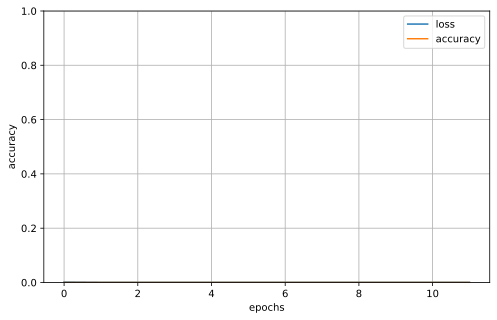

In [ ]:
import matplotlib.pyplot as plt        
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
pred = model.predict(train)

4927/4927 [==============================] - 6s 1ms/step


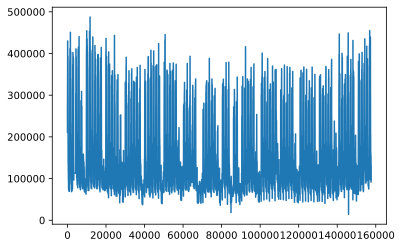

In [ ]:
plt.plot(pred)
# plt.plot(train)

In [ ]:
print(len(pred))

157635


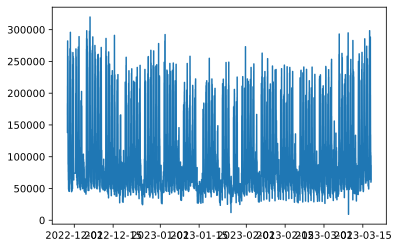

In [ ]:

plt.plot(train)
# plt.plot(test)
# plt.plot(pred)


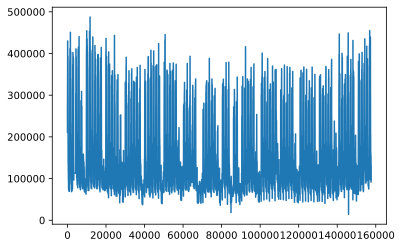

In [ ]:
plt.plot(pred)

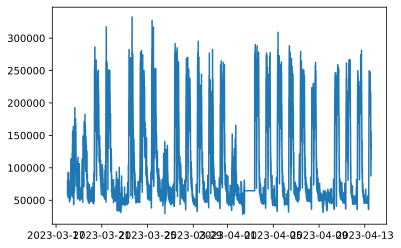

In [ ]:
plt.plot(test)

In [ ]:
from datetime import date

def forecast(num_prediction,model):
    vs = np.array(df['voltage_status'])
    
    forecast_list = pred[-1455:]
    # print(forecast_list)
    # print(len(forecast_list))
    x = forecast_list[-1455:]
    x = x.reshape(-1,1)
    x = scaler.transform(x)
    print(np.shape(x))
    # x = x.reshape(1,11)
    pred2 = TimeseriesGenerator(x,x,length =15,batch_size = 1)
#TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)
    # print(pred2)
    #print(x)
    look_back = 1455
    for _ in range(num_prediction):
        x = forecast_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        #
        out = model.predict(pred2)
        print(out)
        forecast_list = np.append(forecast_list, out)
    forecast_list = forecast_list[look_back:] 
    return forecast_list 

def predict_dates(num_prediction):
    # last_date = df['dates_n'].values[-1]
    last_date = date.today()
    predictions_dates = pd.date_range(last_date,periods = 1440,freq = 'Min').tolist()
    return predictions_dates  

num_prediction = 1
forecast = forecast(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

(1455, 1)
1440/1440 [==============================] - 2s 2ms/step
[[0.01674727]
 [0.01653625]
 [0.01741062]
 ...
 [0.01951785]
 [0.02015462]
 [0.02040449]]


In [ ]:
len(forecast)
forecast_dates = np.array(forecast_dates).reshape(-1,1)
print(np.shape(forecast_dates))

(1440, 1)


In [ ]:
print(np.shape(forecast))

(1440,)


In [ ]:
print(type(forecast))
forecast = forecast.reshape(-1,1)
true_predictions = scaler.inverse_transform(forecast)

<class 'numpy.ndarray'>


In [ ]:
print(np.shape(true_predictions))

(1440, 1)


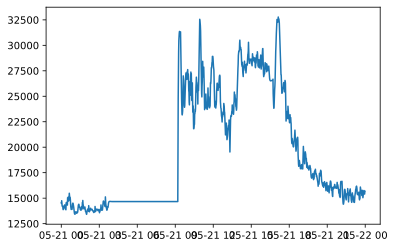

In [ ]:
plt.plot(forecast_dates,true_predictions)


In [ ]:
test = scaler.transform(test)
print(test)

[[2.04127543e+10]
 [1.82488481e+10]
 [1.81339779e+10]
 ...
 [4.27565605e+10]
 [4.21791049e+10]
 [4.06361187e+10]]


In [ ]:
print(date.today())

2023-05-21


In [ ]:
test = scaler.inverse_transform(test)
print(train)

[[5.17319591e+10]
 [5.18530385e+10]
 [5.68421307e+10]
 ...
 [2.42345169e+10]
 [2.37408855e+10]
 [1.99160183e+10]]


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some sample data
# Replace this with your own data
data = np.random.rand(100)

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive')

# Get the seasonal component
seasonal_component = result.seasonal

# Prepare the data for LSTM model
# Split the data into input (X) and output (y) sequences
sequence_length = 10
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(np.concatenate([data[i:i+sequence_length], seasonal_component[i:i+sequence_length]]))
    y.append(data[i+sequence_length])

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape the input data to fit LSTM model requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(2 * sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=16)

# Make predictions with the trained model
# Replace `test_data` with your own data for prediction
test_data = np.random.rand(10)
test_seasonal_component = seasonal_decompose(test_data, model='additive').seasonal
test_input = np.concatenate([test_data, test_seasonal_component])
test_input = test_input.reshape(1, 2 * sequence_length, 1)
predicted_value = model.predict(test_input)

# Print the predicted value
print("Predicted Value:", predicted_value)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some sample data
# Replace this with your own minute-to-minute data
data = np.random.rand(1000)

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=1440)  # Assuming daily seasonality

# Get the seasonal component
seasonal_component = result.seasonal

# Prepare the data for LSTM model
# Split the data into input (X) and output (y) sequences
sequence_length = 10
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(np.concatenate([data[i:i+sequence_length], seasonal_component[i:i+sequence_length]]))
    y.append(data[i+sequence_length])

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape the input data to fit LSTM model requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(2 * sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=16)

# Make predictions with the trained model
# Replace `test_data` with your own minute-to-minute data for prediction
test_data = np.random.rand(10)
test_seasonal_component = seasonal_decompose(test_data, model='additive', period=1440).seasonal
test_input = np.concatenate([test_data, test_seasonal_component])
test_input = test_input.reshape(1, 2 * sequence_length, 1)
predicted_value = model.predict(test_input)

# Print the predicted value
print("Predicted Value:", predicted_value)
